# Uvod: statistika temperatur na severu

Oglejmo si praktično uporabo knjižnice `numpy` na primeru podatkov dnevna temperature v Stockholmu vsak dan med leti 1800 in 2011. 

Podatki so shranjeni v datoteki, kjer vrstice predstavljajo meritve, posamezni podatki - leto, mesec, dan in izmerjena temperatura - pa so ločeni z vejico.

In [1]:
from csv import DictReader

fp = open("stockholm.csv", "rt")
reader = DictReader(fp)

for row in reader:
    print(row)
    break  # izpisi samo prvo vrstico

OrderedDict([('Year', '1800'), ('Month', '1'), ('Day', '1'), ('Temp', '-6.1')])


Predstavitev podatkov v obliki slovarja je koristna zaradi svoje jasnosti, vendar bo računanje bistveno hitrejše,
če podatke naložimo kot polje.

In [2]:
from numpy import *
set_printoptions(suppress=True)

data = loadtxt ('stockholm.csv', delimiter=",", skiprows=1)
data

array([[ 1800. ,     1. ,     1. ,    -6.1],
       [ 1800. ,     1. ,     2. ,   -15.4],
       [ 1800. ,     1. ,     3. ,   -15. ],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

<p> Preverimo velikost podatkov: število vrstic - <i>meritev </i> ali <i>vzorcev</i> in število stolpcev - <i>atributov</i>. </p>

In [3]:
data.shape

(77431, 4)

Stolpci zaporedoma hranijo podatke: `leto`, `mesec`, `dan` in `temperatura`.  Poglejmo si vse meritve, ki so bile narejene v letu 2011. Ustvarimo binarni vektor `data[:, 0] == 2011`, ki vsebuje vrednost `True` nas ustreznih mestih, ter ga uporabimo za naslavljanje podatkov.

In [4]:
data[data[:, 0] == 2011]

array([[ 2011. ,     1. ,     1. ,    -2.3],
       [ 2011. ,     1. ,     2. ,    -3.6],
       [ 2011. ,     1. ,     3. ,    -6.9],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

Poglejmo, kako hladno je bilo na današnji dan pred 200 leti (2. marec 1816).

In [5]:
data[(data[:, 0] == 1816) * (data[:, 1] == 3) * (data[:, 2] == 2), :]

array([[ 1816. ,     3. ,     2. ,   -13.6]])

### Procesiranje podatkov

Na tej točki nastopijo operacije, ki nam povedo nekaj koristnega o podatkih. Izračunali bomo nekaj osnovnih statistik.

#### Povprečje, aritmetična sredina

In [6]:
# Dnevna temperatura je v stolpcu na naslovu 3
mean(data[:,3])

6.1971096847515854

Povprečna dnevna temperatura v Stockholmu v preteklih 200 letih je bila prijetnih 6.2 C. 
<font color="green"><b>Naredi sam/-a.</b></font> Kakšna pa je povprečna temperatura januarja (mesec s številko `1`)?

In [7]:
# Izračunaj povprečno januarsko temperaturo v Stockholmu
# ...

#### Standardni odklon in varianca

In [8]:
std(data[:,3]), var(data[:,3])

(8.2822716213405734, 68.596023209663414)

<font color="green"><b>Naredi sam/-a.</b></font> V katerem mesecu imajo temperature največji odklon? 

In [9]:
# Poišči mesec z največjim odklonom oz. varianco v temperaturi.
# Namig: Uporabi slovar oblike {mesec: odklon v temperaturi, ...}
# ...

#### Minimum in maksimum

In [10]:
# najnižja dnevna temperatura
data[:,3].min()

-25.800000000000001

In [11]:
# najvišja temperatura
data[:,3].max()

28.300000000000001

<font color="green"><b>Naredi sam/-a.</b></font> Pošči mesec in leto, kjer smo beležili največjo temperaturo.

In [12]:
# Poišči mesec in leto, kjer smo v povprečju beležili najvišjo temperaturo
# Uporabi slovar oblike {(leto, mesec): povprecna temperatura, ...}
# ...

#### Vsota, produkt

Temperature ponavadi ne seštevamo, pa vendar izkoristimo priložnost za prikaz funkcij vsote in produkta.

In [13]:
data[:, 3].sum()  # vsota vseh temperatur

479848.40000000002

In [14]:
data[:, 3].sum() / data.shape[0]   # dobimo ravno aritmetično sredino

6.1971096847515854

In [15]:
# prva vrstica v podatkih ...
data[0, :]

array([ 1800. ,     1. ,     1. ,    -6.1])

In [16]:
# ... in njen produkt
prod(data[0, :])

-10980.0

### Globalno segrevanje?

Odgovorimo na še nekaj vprašanj. Po Stockholmu krožijo govorice, da se temperatura iz leta v leto povečuje.

In [17]:
# Izračunajmo povprecno temperaturo za vsako leto posebej 
yearly_temps = dict()

for year in range(1800, 2012):
    # Uporabimo pogojno naslavljanje polja
    yearly_temps[year] = data[data[:, 0] == year, 3].mean()

<font color="green"><b>Naredi sam/-a.</b></font> Izpiši leta, kjer je povprečna temperatura višja od prejšnjega leta in poišči 10 najtoplejših let.

In [18]:
# Izpiši vsako leto, ki ima večjo povprečno temperaturo od prejšnjega
# 

In [19]:
# Poišči 10 najtoplejših let
# 

Zadnja leta so res sumljivo topla.

Risanje podatkov je sicer tema naslednjega tedna, a pogled v prihodnost nikoli ne škodi. Uporabili bomo knjižnico `matplotlib`.

In [20]:
% matplotlib inline
import matplotlib.pyplot as plt

Naredimo novo sliko (figure) in nanjo narišemo povprečne temperature v odvisnosti od časa. 

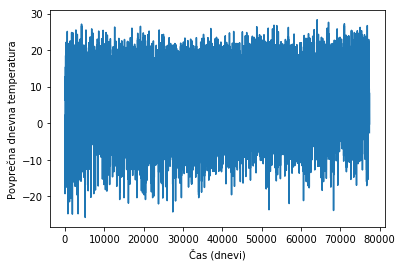

In [21]:
plt.figure()
plt.plot(data[:, 3])
plt.xlabel("Čas (dnevi)")  # Vedno označimo osi.
plt.ylabel("Povprečna dnevna temperatura")
plt.show()

Precej nepregledno. Poizkusite razširiti sliko tako da spremenite `plt.figure(figsize=(sirina, visina))`, kjer sta `visina` in `sirina` podane v palcih oz. inčah (privzeto `(5, 5)`) .

Vseeno pa opazimo, da se pogostost dni s temperaturo nižjo od -20.0 C zmanjšuje. Poglejmo.

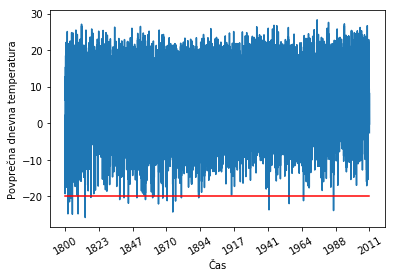

In [22]:
plt.figure()

# Narišimo izvirne podatke
plt.plot(data[:, 3])

# Dodajmo rdečo črto pri -20.0 C.
plt.plot([0, len(data)], [-20, -20], color="red")   

# Spremenimo še oznako x-osi. Dodajmo 10 enako oddaljenih kazalcev.
ticks = arange(0, len(data), len(data)//9, dtype=int)
plt.xticks(ticks)
plt.gca().set_xticklabels(data[ticks, 0].astype(int), rotation=30)

# Vedno označimo osi.
plt.xlabel("Čas")  
plt.ylabel("Povprečna dnevna temperatura")
plt.show()

Od 80-tih let prejšnjega stoletja res nismo imeli kakšnega posebej hladnega dneva. Vseeno pa bi želeli še bolj poenostaviti prikaz, tako, da prikažemo za vsako leto po eno točko s povprečno temperaturo tega leta.

<font color="green"><b>Naredi sam/-a.</b></font> Nariši sliko, s povprečno temperaturo za vsako leto. Uporabi funkcijo `plt.plot(x, y)`  kjer je `x` vektor let, `y` pa vektor pripadajočih povprečnih temperatur. Ali misliš, da se temperatura z leti res povečuje?

In [23]:
# Nariši sliko, ki povzame zgornje podatke.
# Pomagaj si s sloverjem yearly_temps.
# Os x: leta
# Os y: povprečna temperatura za vsako leto
# ...